Import libraries

In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

1) Gaussian Pyramid and 2) Laplacian Pyramids

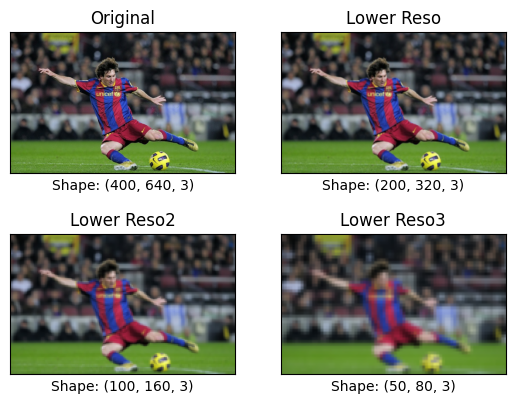

In [16]:
img = cv.imread('../images/messi5.jpg')
assert img is not None, "File could not be read, check with os.path.exists()"

lower_reso = cv.pyrDown(img)
lower_reso2 = cv.pyrDown(lower_reso)
lower_reso3 = cv.pyrDown(lower_reso2)
plt.subplot(221),plt.xticks([]),plt.yticks([]),plt.xlabel(f'Shape: {img.shape}'),plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB)),plt.title('Original')
plt.subplot(222),plt.xticks([]),plt.yticks([]),plt.xlabel(f'Shape: {lower_reso.shape}'),plt.imshow(cv.cvtColor(lower_reso, cv.COLOR_BGR2RGB)),plt.title('Lower Reso')
plt.subplot(223),plt.xticks([]),plt.yticks([]),plt.xlabel(f'Shape: {lower_reso2.shape}'),plt.imshow(cv.cvtColor(lower_reso2, cv.COLOR_BGR2RGB)),plt.title('Lower Reso2')
plt.subplot(224),plt.xticks([]),plt.yticks([]),plt.xlabel(f'Shape: {lower_reso3.shape}'),plt.imshow(cv.cvtColor(lower_reso3, cv.COLOR_BGR2RGB)),plt.title('Lower Reso3')
plt.show()

Now you can go down the image pyramid with cv.pyrUp() function.

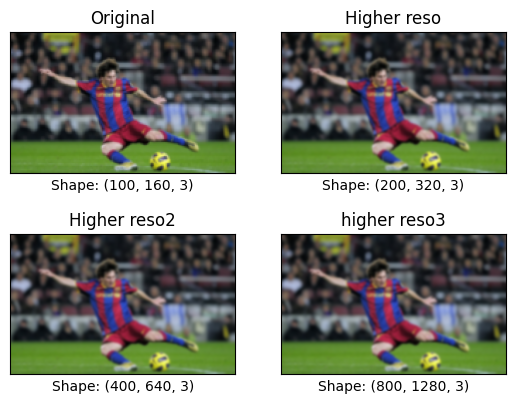

In [17]:
higher_reso = cv.pyrUp(lower_reso2)
higher_reso2 = cv.pyrUp(higher_reso)
higher_reso3 = cv.pyrUp(higher_reso2)
plt.subplot(221),plt.xticks([]),plt.yticks([]),plt.xlabel(f'Shape: {lower_reso2.shape}'),plt.imshow(cv.cvtColor(lower_reso2, cv.COLOR_BGR2RGB)),plt.title('Original')
plt.subplot(222),plt.xticks([]),plt.yticks([]),plt.xlabel(f'Shape: {higher_reso.shape}'),plt.imshow(cv.cvtColor(higher_reso, cv.COLOR_BGR2RGB)),plt.title('Higher reso')
plt.subplot(223),plt.xticks([]),plt.yticks([]),plt.xlabel(f'Shape: {higher_reso2.shape}'),plt.imshow(cv.cvtColor(higher_reso2, cv.COLOR_BGR2RGB)),plt.title('Higher reso2')
plt.subplot(224),plt.xticks([]),plt.yticks([]),plt.xlabel(f'Shape: {higher_reso3.shape}'),plt.imshow(cv.cvtColor(higher_reso3, cv.COLOR_BGR2RGB)),plt.title('higher reso3')
plt.show()

Image Blending using Pyramids

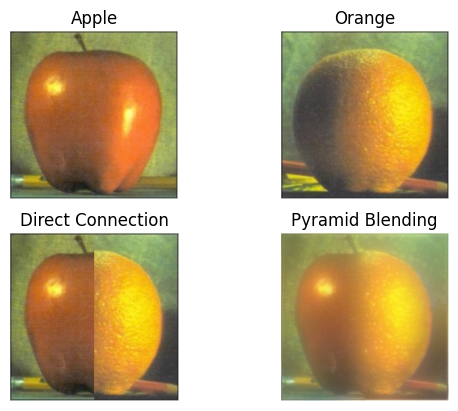

In [23]:
A = cv.imread('../images/apple.jpg')
B = cv.imread('../images/orange.jpg')
assert A is not None, "File A could not be read, check with os.path.exists()"
assert B is not None, "File B could not be read, check with os.path.exists()"

# Ensure that both images have the same dimensions (number of rows)
rows_A, cols_A, dpt_A = A.shape
rows_B, cols_B, dpt_B = B.shape

# Resize one of the images to match the dimensions of the other
if rows_A < rows_B:
    B = B[:rows_A, :]
elif rows_B < rows_A:
    A = A[:rows_B, :]

# Generate Gaussian pyramid for A
G = A.copy()
gpA = [G]
for i in range(6):
    G = cv.pyrDown(G)
    gpA.append(G)

# Generate Gaussian pyramid for B
G = B.copy()
gpB = [G]
for i in range(6):
    G = cv.pyrDown(G)
    gpB.append(G)

# Generate Laplacian Pyramid for A
lpA = [gpA[5]]
for i in range(5, 0, -1):
    GE = cv.pyrUp(gpA[i])
    rows, cols, dpt = gpA[i - 1].shape  # Update rows and cols
    L = cv.subtract(gpA[i - 1], GE[:rows, :cols])
    lpA.append(L)

# Generate Laplacian Pyramid for B
lpB = [gpB[5]]
for i in range(5, 0, -1):
    GE = cv.pyrUp(gpB[i])
    rows, cols, dpt = gpB[i - 1].shape  # Update rows and cols
    L = cv.subtract(gpB[i - 1], GE[:rows, :cols])
    lpB.append(L)

# Now add left and right halves of images in each level
LS = []
for la, lb in zip(lpA, lpB):
    rows_la, cols_la, dpt = la.shape
    rows_lb, cols_lb, dpt = lb.shape

    # Ensure both arrays have the same number of rows
    min_rows = min(rows_la, rows_lb)
    la = la[:min_rows, :]
    lb = lb[:min_rows, :]

    # Horizontally stack the adjusted arrays
    ls = np.hstack((la[:, :cols_la // 2], lb[:, cols_lb // 2:]))
    LS.append(ls)

# Now reconstruct
ls_ = LS[0]
for i in range(1, 6):
    ls_ = cv.pyrUp(ls_)
    # Resize LS[i] to match the dimensions of ls_
    rows_ls, cols_ls, _ = ls_.shape
    LS[i] = cv.resize(LS[i], (cols_ls, rows_ls))
    ls_ = cv.add(ls_, LS[i])

# Image with direct connecting each half
real = np.hstack((A[:, :cols_A // 2], B[:, cols_B // 2:]))

plt.subplot(221), plt.axis('off'), plt.imshow(cv.cvtColor(A, cv.COLOR_BGR2RGB)), plt.title('Apple')
plt.subplot(222), plt.axis('off'), plt.imshow(cv.cvtColor(B, cv.COLOR_BGR2RGB)), plt.title('Orange')
plt.subplot(223), plt.axis('off'), plt.imshow(cv.cvtColor(real, cv.COLOR_BGR2RGB)), plt.title('Direct Connection')
plt.subplot(224), plt.axis('off'), plt.imshow(cv.cvtColor(ls_, cv.COLOR_BGR2RGB)), plt.title('Pyramid Blending')
plt.show()
